#### Name : SINU S MARIAM
#### Designation : Machine Learning Intern  
#### Organization : CodSoft
#### Batch : APRIL BATCH P43
#### Task 2 - CREDIT CARD FRAUD DETECTION
#### Problem Statement:
* Build a model to detect fraudulent credit card transactions 
* Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees,or Random Forests to classify transactions as fraudulent or legitimate.

In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib as plt
from matplotlib import style
import seaborn as sns

In [2]:
#importing Train and Test Data
data_frame_train=pd.read_csv('C:/Users/sinus/OneDrive/Documents/codsoft/credit_card_code/fraudTrain.csv')
data_frame_test=pd.read_csv('C:/Users/sinus/OneDrive/Documents/codsoft/credit_card_code/fraudTest.csv')

In [4]:
# Understanding the dimensions of train data
data_frame_train.shape

(1296675, 23)

In [5]:
# Show the top 5 Rows of data
data_frame_train.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
# Understanding the Data Variables
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
# Dimensions of train dataset
data_frame_train.shape

(1296675, 23)

In [9]:
# Dimensions of test dataset
data_frame_test.shape

(555719, 23)

In [11]:
# Checking for null values
data_frame_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
# Converting date columns to date time objects
data_frame_train['trans_date_trans_time'] = pd.to_datetime(data_frame_train['trans_date_trans_time'])
data_frame_train['dob']=pd.to_datetime(data_frame_train['dob'])
data_frame_test['trans_date_trans_time'] = pd.to_datetime(data_frame_test['trans_date_trans_time'])
data_frame_test['dob']=pd.to_datetime(data_frame_test['dob'])

In [13]:
# Checking values of street column
data_frame_train.street.value_counts()

0069 Robin Brooks Apt. 695           3123
864 Reynolds Plains                  3123
8172 Robertson Parkways Suite 072    3119
4664 Sanchez Common Suite 930        3117
8030 Beck Motorway                   3113
                                     ... 
7281 Joshua Mills Apt. 077              7
3307 Ferguson Way                       7
9599 Washington Field Suite 238         7
3437 Ross Flat Apt. 592                 7
27954 Hall Mill Suite 575               7
Name: street, Length: 983, dtype: int64

In [14]:
# Checking values of cc_num column
data_frame_train.cc_num.value_counts()

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64

In [15]:
# Checking values of merchant column
data_frame_train.merchant.value_counts()

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

In [16]:
# Checking values of city column
data_frame_train.city.value_counts()

Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: city, Length: 894, dtype: int64

In [17]:
# Checking values of category column
data_frame_train.category.value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [18]:
# Checking values of trans_num column
data_frame_train.trans_num .value_counts()

0b242abb623afc578575680df30655b9    1
c85864e7e7cf0be6d1b8597977b8afea    1
1a8a2a05638a5503cc6bb8d5735efcc1    1
4556eaf1f7def06eb500325cde4d054e    1
5e915d9f88bd09cee9655a470d9bc0bd    1
                                   ..
2d1aa5b21a993788ac19b697598ca44c    1
b50dd4b47d1ad877874661afba6eb7f6    1
5ce4e974bf15b7d9f133c6eedb81ceb1    1
64d601ddeaf4eba8b191bd1859998209    1
8f7c8e4ab7f25875d753b422917c98c9    1
Name: trans_num, Length: 1296675, dtype: int64

In [19]:
# Checking values of job column
data_frame_train.job.value_counts()

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64

In [20]:
# Checking values of unix_time column
data_frame_train.unix_time.value_counts()

1370177227    4
1335110521    4
1370050667    4
1367602155    3
1364686521    3
             ..
1342203558    1
1342203557    1
1342203554    1
1342203541    1
1371816817    1
Name: unix_time, Length: 1274823, dtype: int64

In [21]:
# Checking values of trans_date_trans_time column
data_frame_train.trans_date_trans_time.value_counts()

2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2019-11-18 23:03:49    3
2019-12-01 14:11:58    3
                      ..
2019-07-13 18:38:18    1
2019-07-13 18:37:26    1
2019-07-13 18:35:46    1
2019-07-13 18:35:41    1
2020-06-21 12:13:37    1
Name: trans_date_trans_time, Length: 1274791, dtype: int64

In [22]:
# Dropping unwanted columns from Train and Test Datasets
data_frame_train.drop(columns=['Unnamed: 0','trans_num','cc_num','merchant','first','last','street','zip','unix_time'],axis=1,inplace=True)
data_frame_test.drop(columns=['Unnamed: 0','trans_num','cc_num','merchant','first','last','street','zip','unix_time'],axis=1,inplace=True)
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [23]:
# Find value count of 'is_fraud' column
data_frame_train.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

* There are 7506 fraud transactions listed in train data set

#### Data Visualization

<Axes: >

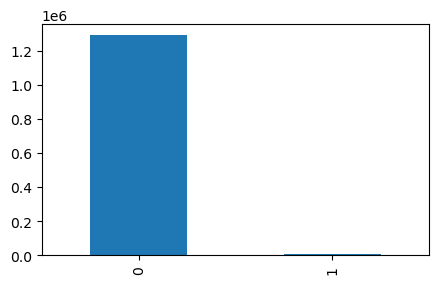

In [24]:
# Plotting histogram of Fraud and non_Fraud transactions
data_frame_train["is_fraud"].value_counts().plot(kind="bar",figsize=(5,3))

* Data is Highly Imbalanced 

<Axes: xlabel='gender', ylabel='Percent'>

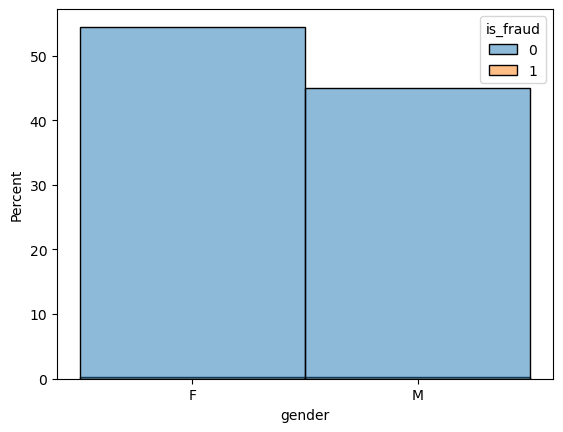

In [25]:
# Plotting Histogram of genderwise fraud transaction count
sns.histplot(data_frame_train,x="gender",hue="is_fraud",stat='percent')

In [26]:
# Combining train and test data sets
data_frame_combined=pd.concat([data_frame_train,data_frame_test])
data_frame_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memory usage: 212.0+ MB


In [27]:
# Finding the exact 'hours' in which transactions takes place
data_frame_combined['hour']=data_frame_combined['trans_date_trans_time'].dt.hour
data_frame_combined.head(2)

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0


In [28]:
# Finding unique values in 'hour' column
data_frame_combined['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [29]:
# Finding unique value counts in 'hour' column
data_frame_combined['hour'].value_counts()

23    95902
22    95370
16    94289
18    94052
21    93738
17    93514
13    93492
15    93439
19    93433
12    93294
14    93089
20    93081
1     61330
3     60968
2     60796
0     60655
8     60498
6     60406
10    60320
7     60301
9     60231
11    60170
5     60088
4     59938
Name: hour, dtype: int64

<Axes: >

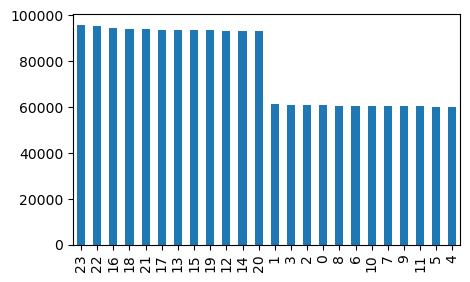

In [30]:
# Plotting histogram of transaction hours
data_frame_combined["hour"].value_counts().plot(kind="bar",figsize=(5,3))

<Axes: xlabel='hour', ylabel='count'>

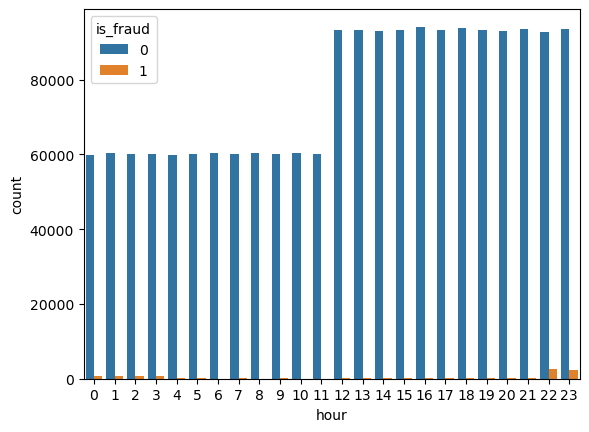

In [31]:
# Plotting transaction hours of fraud and non-fraud transactions
sns.countplot(data_frame_combined,x='hour',hue='is_fraud')

* Most of transactions occured between 12:00 and 23:00
* Most of fraudulent transactions happened in time zone 22:00 pm and 23:00  , then during 0:00 and 3:00

In [32]:
# Finding date of birth year and the year in which transaction was done
data_frame_combined['year']=data_frame_combined['trans_date_trans_time'].dt.year
data_frame_combined['dob year']=data_frame_combined['dob'].dt.year
data_frame_combined.head(2)

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,year,dob year
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0,2019,1988
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0,2019,1978


In [33]:
data_frame_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  hour                   int64         
 15  year                   int64         
 16  dob year               int64         
dtypes: datetime64[ns](2), float64(5), int64(5), object(5)
memory usage

In [34]:
# Find the approximate age of persons included in dataset
data_frame_combined['age']=data_frame_combined['year']-data_frame_combined['dob year']
data_frame_combined.drop(columns=['year','dob year'],axis=1,inplace=True)
data_frame_combined.head(2)

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,age
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0,31
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0,41


In [35]:
# Drop columns 'trans_date_trans_time' and 'dob' as we have derived enough data from them
data_frame_combined.drop(columns=['trans_date_trans_time','dob'],axis=1,inplace=True)

In [36]:
# One hot encoding variables
data_frame_combined= pd.get_dummies(data_frame_combined,columns=['gender'])
data_frame_combined= pd.get_dummies(data_frame_combined,columns=['category'])
data_frame_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   city                     object 
 2   state                    object 
 3   lat                      float64
 4   long                     float64
 5   city_pop                 int64  
 6   job                      object 
 7   merch_lat                float64
 8   merch_long               float64
 9   is_fraud                 int64  
 10  hour                     int64  
 11  age                      int64  
 12  gender_F                 uint8  
 13  gender_M                 uint8  
 14  category_entertainment   uint8  
 15  category_food_dining     uint8  
 16  category_gas_transport   uint8  
 17  category_grocery_net     uint8  
 18  category_grocery_pos     uint8  
 19  category_health_fitness  uint8  
 20  category_home            uint8  
 21  category_

In [37]:
# Show the top 5 rows of new dataset
data_frame_combined.head(5)

,amt,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
# Identifing Numerical Columns in Dataset
data_frame_combined=data_frame_combined.select_dtypes(include=['float64','int64','uint8'])
data_frame_combined.columns

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud',
       'hour', 'age', 'gender_F', 'gender_M', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

#### Splitting the combined dataset for training and testing

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
#First step in building the model is to identify the Feature(Input) variables and Target (Output) variable
features_combined=data_frame_combined.drop(["is_fraud"],axis=1)
target_combined=data_frame_combined["is_fraud"]

In [42]:
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train,X_test,y_train,y_test=train_test_split(features_combined,target_combined,train_size=0.7)
# Dimensions of 'New' Train and Test Data sets
print('Dimensions of Newly formed Train Dataset features :',X_train.shape)
print('Dimensions of Newly formed Test Dataset Features : ',X_test.shape)
print('Dimensions of Target for Newly formed Train dataset: ',y_train.shape)
print('Dimensions of Target for Newly formed Test dataset: ' ,y_test.shape)

Dimensions of Newly formed Train Dataset features : (1296675, 24)
Dimensions of Newly formed Test Dataset Features :  (555719, 24)
Dimensions of Target for Newly formed Train dataset:  (1296675,)
Dimensions of Target for Newly formed Test dataset:  (555719,)


#### SMOTE (Synthetic Minority Oversampling Technique)
* To perform oversampling inorder to resolve the issue of DATA IMBALANCE

In [43]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_sm,y_sm = smote.fit_resample(X_train.astype('float'), y_train)

In [44]:
# Dimensions after application of SMOTE
x_sm.shape
y_sm.shape

(2579864,)

### Building the Models

###  Logistic Regression Model

In [45]:
# Learn the Logistic Regression Model on train data
from sklearn.linear_model import LogisticRegression
my_model_LR=LogisticRegression()

In [46]:
# Fitting the model in train data set ie the  Logistic Regression Model should learn from the Train Data
my_model_LR=my_model_LR.fit(x_sm,y_sm)

In [47]:
# Predicting fraud/Non-fraud transactions from Feature Test values
y_pred_LR = my_model_LR.predict(X_test)
y_pred_LR 

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

#### Testing the Logistic Regression Model

In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [49]:
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred_LR)

0.9498901423201295

In [50]:
# find Precision Score= TP/(TP+FP)
precision_score(y_test, y_pred_LR)

0.07434715821812596

In [51]:
# Recall = TP/(TP+FN)
# Recall gives the percentage of positives well predicted by our model.
recall_score(y_test, y_pred_LR)

0.7489683631361761

In [52]:
# f1_score= (Precition * Recall )/ (Precition + Recall)
f1_score(y_test, y_pred_LR)

0.13526690059932306

* Logistic Regression Model has good Accuracy Score, but Precision score and f1 scores are not good

### 2. Decision Tree model

In [53]:
from sklearn.tree import DecisionTreeClassifier
my_model_DT=DecisionTreeClassifier(max_depth=10,random_state = 0)

In [54]:
# Fitting the DT model in train data set 
my_model_DT=my_model_DT.fit(x_sm,y_sm)

In [55]:
# Predicting fraud/Non-fraud transactions from Feature Test values
y_pred_DT=my_model_DT.predict(X_test)
y_pred_DT

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

#### Testing the Decision Tree Classifier Model

In [56]:
accuracy_score(y_test,y_pred_DT)

0.9823777844558131

In [57]:
precision_score(y_test,y_pred_DT)

0.2175732217573222

In [58]:
recall_score(y_test,y_pred_DT)

0.9119669876203577

In [59]:
f1_score(y_test,y_pred_DT)

0.3513280784261774

* Decision Tree Classifier Model has good Accuracy score and Recall score , but precision score and f1 scores are not good

### 3. Random Forest Classifier Model

In [62]:
from sklearn.ensemble import RandomForestClassifier
my_model_RF=RandomForestClassifier(random_state=10)

In [63]:
# Fitting the Random Forest Classifier model in train data set
my_model_RF=my_model_RF.fit(x_sm,y_sm)

In [64]:
# Predicting fraud/Non-fraud transactions from Feature Test values
y_pred_RF=my_model_RF.predict(X_test)
y_pred_RF

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

#### Testing the Random Forest Classifier Model

In [65]:
accuracy_score(y_test, y_pred_RF)

0.9984722494642077

In [66]:
precision_score(y_test, y_pred_RF)

0.8945956305097739

In [67]:
recall_score(y_test, y_pred_RF)

0.8026134800550206

In [68]:
f1_score(y_test, y_pred_RF)

0.8461120174007613

 * Random Forest has good Accuracy , Precision, Recall and f1 score 

--------------------THE END----------------------